**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**July, 2023**

---

# Notebook to assing and explore the cell type predictions product of the logistic regression from the MFI reference


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata
import scvi


In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/integrated/annotation/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
absl                NA
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiw

'/opt/conda/bin/python'

In [3]:
#Function to add the souporcell id

def add_souporcell_id(adata_obj, cell_id, souporcell_clusters):
    '''
    Function to add the souporcell status (e.g. 0,1, not pooled, etc.) to the cells
    
    Input
        adata_obj: adata object
        cell_id: id of a cell
    
    '''
    
    curr_sample = adata_obj.obs.loc[cell_id, 'sample']
    
    #print('sample',sample, 'barcode', cell_id)
    
    if curr_sample in samples:
        #extracts the table contained in the indicated key of the dictionary
        curr_souporcell_table = souporcell_clusters[curr_sample]
        
        if (cell_id in list(curr_souporcell_table.index)): #checking that the cells are into the data
            curr_assign = souporcell_clusters[curr_sample].loc[cell_id,'assignment']
            #print('returning',curr_assign)
            return(curr_assign)

        else:
            # cell barcode is filtered by souporcell
            return('filtered_by_souporcell')
    else:
        return('not_pooled')

In [40]:
adata= sc.read('../results/scVI/rna3_scVIintegrated_All_latent20.h5ad')

In [41]:
adata

AnnData object with n_obs × n_vars = 119146 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'sample_barcode', 'assignment_SoC', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'donor_id_colors', 'hpi_colors', 'hvg', 'infection_colors', 'leiden', 'leiden_scvi_colors', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw_counts'

# Loading log regression- label transfering predictions

In [42]:
#
prediction= pd.read_csv('../results/log_regression/logreg_MFIref_InfectedExplants_HVGs_20230707_48h.csv', index_col=0)

In [43]:
prediction

celltype_predictions  probabilities
Pla_HDBR13007976_AAACCCAAGCCTCATA                 HOFB       0.582426
Pla_HDBR13007976_AAACCCAAGCTGTTAC                  SCT       0.988561
Pla_HDBR13007976_AAACCCAAGGCATCAG                 HOFB       0.551951
Pla_HDBR13007976_AAACCCAAGGGAGATA                 uSMC       0.239289
Pla_HDBR13007976_AAACCCACACTAAACC                  SCT       0.999115
...                                                ...            ...
Pla_HDBR13661576_TTTGTTGGTCACTGAT               Endo_M       0.870441
Pla_HDBR13661576_TTTGTTGGTTTCGGCG                  dM1       0.668013
Pla_HDBR13661576_TTTGTTGTCAGCTGAT               Endo_F       0.625092
Pla_HDBR13661576_TTTGTTGTCGGTTGTA               Endo_L       0.356187
Pla_HDBR13661576_TTTGTTGTCTGGTTGA                 HOFB       0.828558

[119146 rows x 2 columns]

In [44]:
adata.obs= adata.obs.join(prediction)

In [45]:
adata.obs.head()

sample   stage          donor  \
Pla_HDBR13007976_AAACCCAAGCCTCATA  Pla_HDBR13007976  UI_48h  Hrv171_Hrv172   
Pla_HDBR13007976_AAACCCAAGCTGTTAC  Pla_HDBR13007976  UI_48h  Hrv171_Hrv172   
Pla_HDBR13007976_AAACCCAAGGCATCAG  Pla_HDBR13007976  UI_48h  Hrv171_Hrv172   
Pla_HDBR13007976_AAACCCAAGGGAGATA  Pla_HDBR13007976  UI_48h  Hrv171_Hrv172   
Pla_HDBR13007976_AAACCCACACTAAACC  Pla_HDBR13007976  UI_48h  Hrv171_Hrv172   

                                   hpi infection  percent_mito  n_counts  \
Pla_HDBR13007976_AAACCCAAGCCTCATA  48h        UI      0.035724   32751.0   
Pla_HDBR13007976_AAACCCAAGCTGTTAC  48h        UI      0.023832   33232.0   
Pla_HDBR13007976_AAACCCAAGGCATCAG  48h        UI      0.017998   17502.0   
Pla_HDBR13007976_AAACCCAAGGGAGATA  48h        UI      0.142183    6358.0   
Pla_HDBR13007976_AAACCCACACTAAACC  48h        UI      0.014511   29081.0   

                                  batch                     sample_barcode  \
Pla_HDBR13007976_AAACCCAAGCCTCATA     0  Pla_HDBR13007976_AAACCCAAGCCTCATA   
Pla_HDBR13007976_AAACCCAAGCTGTTAC     0  Pla_HDBR13007976_AAACCCAAGCTGTTAC   
Pla_HDBR13007976_AAACCCAAGGCATCAG     0  Pla_HDBR13007976_AAACCCAAGGCATCAG   
Pla_HDBR13007976_AAACCCAAGGGAGATA     0  Pla_HDBR13007976_AAACCCAAGGGAGATA   
Pla_HDBR13007976_AAACCCACACTAAACC     0  Pla_HDBR13007976_AAACCCACACTAAACC   

                                  assignment_SoC  ... pct_counts_tg  \
Pla_HDBR13007976_AAACCCAAGCCTCATA              1  ...           0.0   
Pla_HDBR13007976_AAACCCAAGCTGTTAC              0  ...           0.0   
Pla_HDBR13007976_AAACCCAAGGCATCAG              1  ...           0.0   
Pla_HDBR13007976_AAACCCAAGGGAGATA              0  ...           0.0   
Pla_HDBR13007976_AAACCCACACTAAACC              1  ...           0.0   

                                   Tg_infected  n_genes  _scvi_batch  \
Pla_HDBR13007976_AAACCCAAGCCTCATA        False     6472            5   
Pla_HDBR13007976_AAACCCAAGCTGTTAC        False     3822            4   
Pla_HDBR13007976_AAACCCAAGGCATCAG        False     4489            5   
Pla_HDBR13007976_AAACCCAAGGGAGATA        False      450            4   
Pla_HDBR13007976_AAACCCACACTAAACC        False     4465            5   

                                   _scvi_labels  _scvi_local_l_mean  \
Pla_HDBR13007976_AAACCCAAGCCTCATA             0            9.317964   
Pla_HDBR13007976_AAACCCAAGCTGTTAC             0            9.502701   
Pla_HDBR13007976_AAACCCAAGGCATCAG             0            9.317964   
Pla_HDBR13007976_AAACCCAAGGGAGATA             0            9.502701   
Pla_HDBR13007976_AAACCCACACTAAACC             0            9.317964   

                                   _scvi_local_l_var leiden_scvi  \
Pla_HDBR13007976_AAACCCAAGCCTCATA           0.835832           0   
Pla_HDBR13007976_AAACCCAAGCTGTTAC           1.113210           5   
Pla_HDBR13007976_AAACCCAAGGCATCAG           0.835832           0   
Pla_HDBR13007976_AAACCCAAGGGAGATA           1.113210          10   
Pla_HDBR13007976_AAACCCACACTAAACC           0.835832           5   

                                   celltype_predictions  probabilities  
Pla_HDBR13007976_AAACCCAAGCCTCATA                  HOFB       0.582426  
Pla_HDBR13007976_AAACCCAAGCTGTTAC                   SCT       0.988561  
Pla_HDBR13007976_AAACCCAAGGCATCAG                  HOFB       0.551951  
Pla_HDBR13007976_AAACCCAAGGGAGATA                  uSMC       0.239289  
Pla_HDBR13007976_AAACCCACACTAAACC                   SCT       0.999115  

[5 rows x 36 columns]

In [46]:
adata.obs.tail()

sample   stage   donor  hpi  \
Pla_HDBR13661576_TTTGTTGGTCACTGAT  Pla_HDBR13661576  Lm_48h  Hrv236  48h   
Pla_HDBR13661576_TTTGTTGGTTTCGGCG  Pla_HDBR13661576  Lm_48h  Hrv236  48h   
Pla_HDBR13661576_TTTGTTGTCAGCTGAT  Pla_HDBR13661576  Lm_48h  Hrv236  48h   
Pla_HDBR13661576_TTTGTTGTCGGTTGTA  Pla_HDBR13661576  Lm_48h  Hrv236  48h   
Pla_HDBR13661576_TTTGTTGTCTGGTTGA  Pla_HDBR13661576  Lm_48h  Hrv236  48h   

                                  infection  percent_mito  n_counts batch  \
Pla_HDBR13661576_TTTGTTGGTCACTGAT        Lm      0.026275   37298.0     2   
Pla_HDBR13661576_TTTGTTGGTTTCGGCG        Lm      0.044556    6576.0     2   
Pla_HDBR13661576_TTTGTTGTCAGCTGAT        Lm      0.049094   21082.0     2   
Pla_HDBR13661576_TTTGTTGTCGGTTGTA        Lm      0.082192    3942.0     2   
Pla_HDBR13661576_TTTGTTGTCTGGTTGA        Lm      0.135040   13322.0     2   

                                                      sample_barcode  \
Pla_HDBR13661576_TTTGTTGGTCACTGAT  Pla_HDBR13661576_TTTGTTGGTCACTGAT   
Pla_HDBR13661576_TTTGTTGGTTTCGGCG  Pla_HDBR13661576_TTTGTTGGTTTCGGCG   
Pla_HDBR13661576_TTTGTTGTCAGCTGAT  Pla_HDBR13661576_TTTGTTGTCAGCTGAT   
Pla_HDBR13661576_TTTGTTGTCGGTTGTA  Pla_HDBR13661576_TTTGTTGTCGGTTGTA   
Pla_HDBR13661576_TTTGTTGTCTGGTTGA  Pla_HDBR13661576_TTTGTTGTCTGGTTGA   

                                  assignment_SoC  ... pct_counts_tg  \
Pla_HDBR13661576_TTTGTTGGTCACTGAT     not_pooled  ...           NaN   
Pla_HDBR13661576_TTTGTTGGTTTCGGCG     not_pooled  ...           NaN   
Pla_HDBR13661576_TTTGTTGTCAGCTGAT     not_pooled  ...           NaN   
Pla_HDBR13661576_TTTGTTGTCGGTTGTA     not_pooled  ...           NaN   
Pla_HDBR13661576_TTTGTTGTCTGGTTGA     not_pooled  ...           NaN   

                                   Tg_infected  n_genes  _scvi_batch  \
Pla_HDBR13661576_TTTGTTGGTCACTGAT          nan     7275            2   
Pla_HDBR13661576_TTTGTTGGTTTCGGCG          nan     3047            2   
Pla_HDBR13661576_TTTGTTGTCAGCTGAT          nan     5860            2   
Pla_HDBR13661576_TTTGTTGTCGGTTGTA          nan     1988            2   
Pla_HDBR13661576_TTTGTTGTCTGGTTGA          nan     4066            2   

                                   _scvi_labels  _scvi_local_l_mean  \
Pla_HDBR13661576_TTTGTTGGTCACTGAT             0            9.286535   
Pla_HDBR13661576_TTTGTTGGTTTCGGCG             0            9.286535   
Pla_HDBR13661576_TTTGTTGTCAGCTGAT             0            9.286535   
Pla_HDBR13661576_TTTGTTGTCGGTTGTA             0            9.286535   
Pla_HDBR13661576_TTTGTTGTCTGGTTGA             0            9.286535   

                                   _scvi_local_l_var leiden_scvi  \
Pla_HDBR13661576_TTTGTTGGTCACTGAT           1.123005           6   
Pla_HDBR13661576_TTTGTTGGTTTCGGCG           1.123005           8   
Pla_HDBR13661576_TTTGTTGTCAGCTGAT           1.123005           2   
Pla_HDBR13661576_TTTGTTGTCGGTTGTA           1.123005           6   
Pla_HDBR13661576_TTTGTTGTCTGGTTGA           1.123005           0   

                                   celltype_predictions  probabilities  
Pla_HDBR13661576_TTTGTTGGTCACTGAT                Endo_M       0.870441  
Pla_HDBR13661576_TTTGTTGGTTTCGGCG                   dM1       0.668013  
Pla_HDBR13661576_TTTGTTGTCAGCTGAT                Endo_F       0.625092  
Pla_HDBR13661576_TTTGTTGTCGGTTGTA                Endo_L       0.356187  
Pla_HDBR13661576_TTTGTTGTCTGGTTGA                  HOFB       0.828558  

[5 rows x 36 columns]

In [47]:
#removing donor column which only contains Tg samples donors, this to avoid future confusions
adata.obs= adata.obs.drop(columns='donor')

#Creating new column to plot the scrublet doublets
adata.obs['scrublet_doublet']=adata.obs.is_doublet.astype('string')

... storing 'celltype_predictions' as categorical
... storing 'scrublet_doublet' as categorical
... storing 'cell_type_2022' as categorical


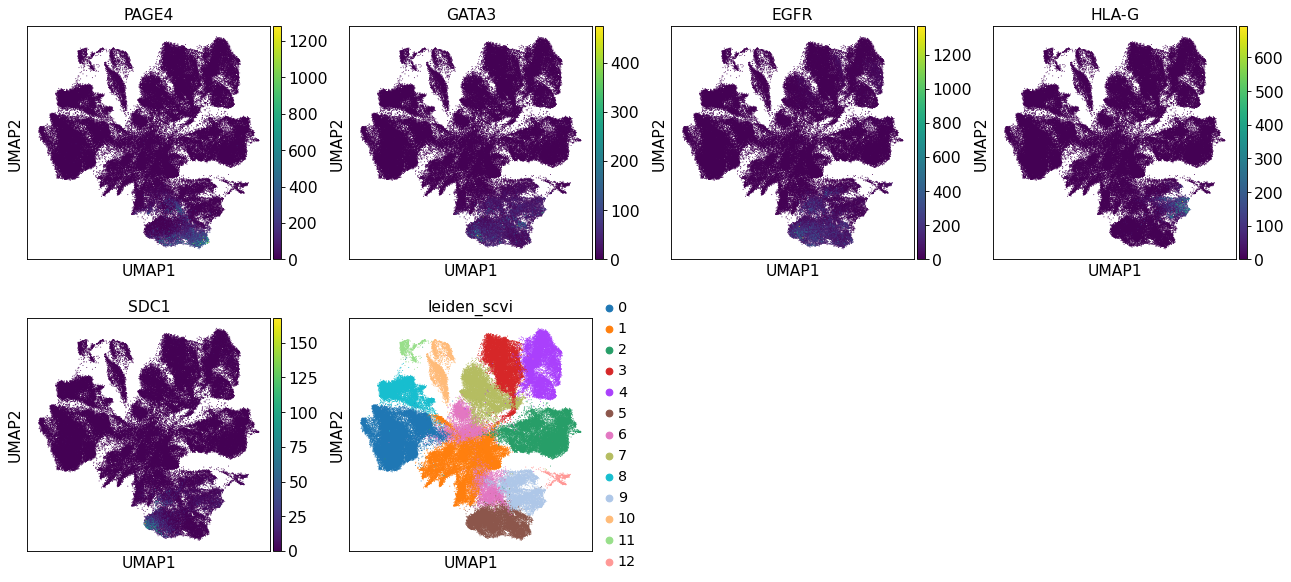

In [15]:
sc.pl.umap(adata, color=['PAGE4', 'GATA3', 'EGFR', 'HLA-G','SDC1','leiden_scvi']
           ,use_raw=False, size=3)

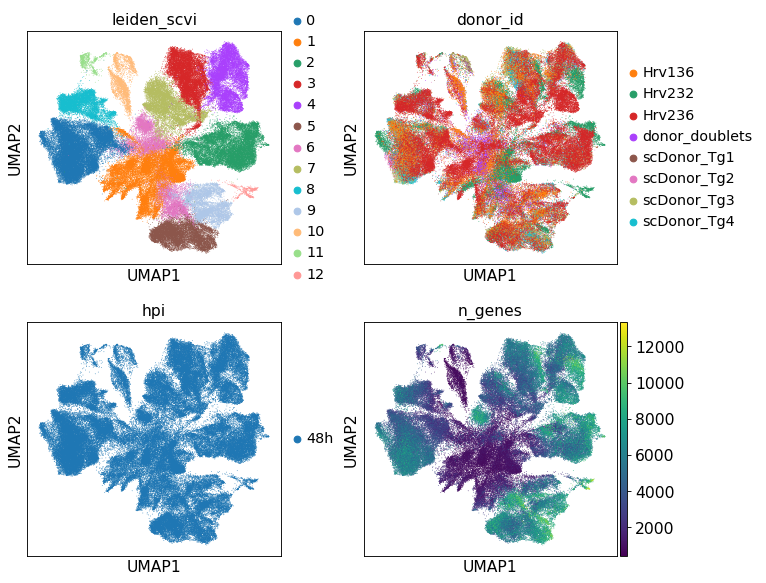

In [16]:
sc.pl.umap(adata, color=["leiden_scvi",'donor_id', 
                         'hpi','n_genes' ], ncols=2, size=2)

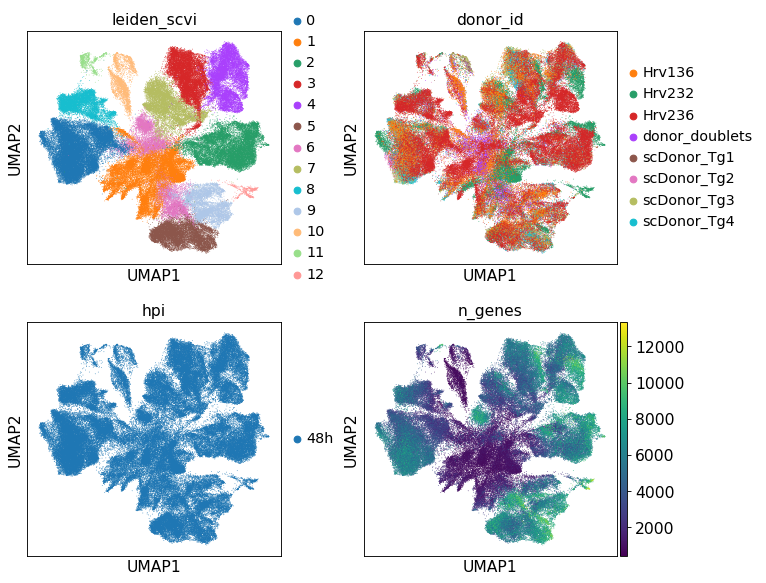

In [17]:
sc.pl.umap(adata, color=["leiden_scvi",'donor_id', 
                         'hpi','n_genes' ], ncols=2, size=2)

In [18]:
sc.set_figure_params(figsize=(6.5,6.5))

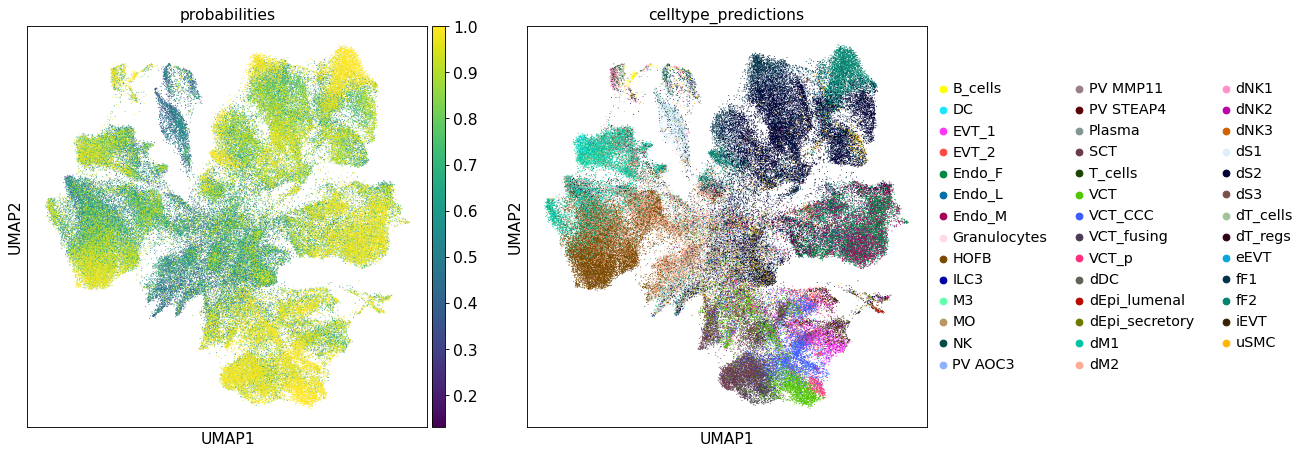

In [19]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=[ 'probabilities','celltype_predictions'], save='_scVI_latent0_labTransfering.pdf', size=3)

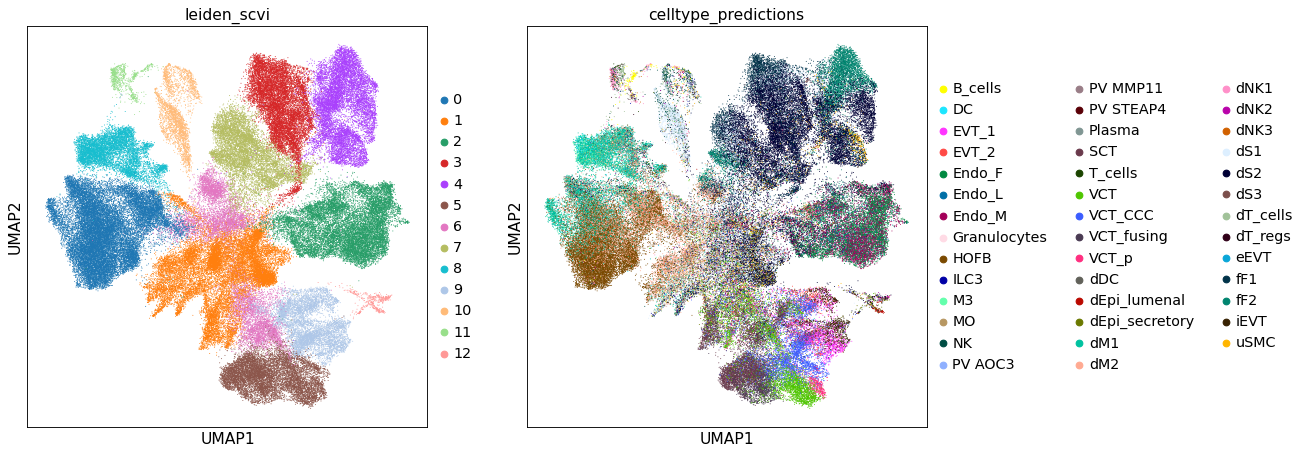

In [26]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=[ 'leiden_scvi','celltype_predictions'], save='_scVI_latent20_labTransferingClust.pdf',
           ncols=2, size=3)

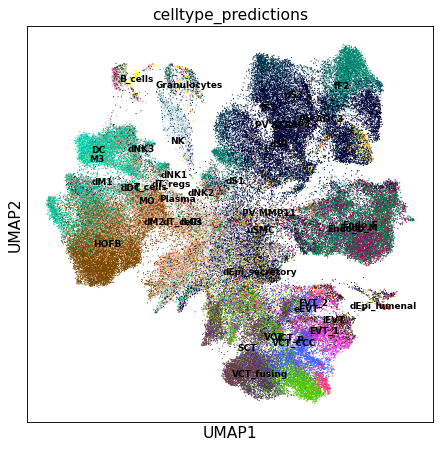

In [29]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['celltype_predictions' ], legend_loc='on data',legend_fontsize='xx-small',
           size=4, save='_scVI_latent20_labTransferOndata.pdf')

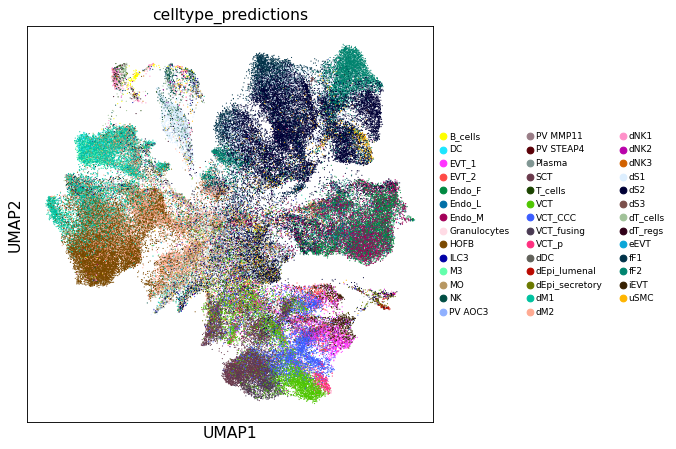

In [30]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['celltype_predictions' ], legend_fontsize='xx-small',
           size=4)

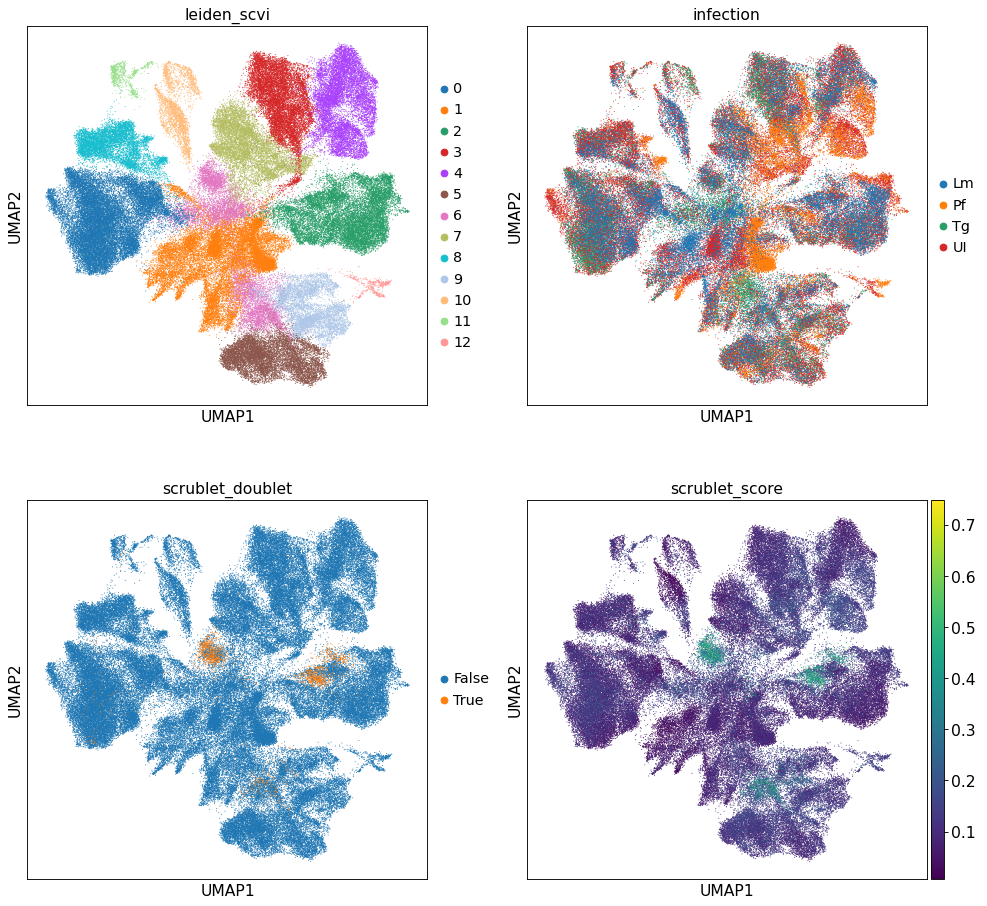

In [27]:
sc.pl.umap(adata, color=["leiden_scvi", "infection" , "scrublet_doublet",'scrublet_score'], ncols=2, size=3)

---

## Broad annotation of cell clusters

## Cluster pre-labeling

The marker genes already reported for different cell types were intensively analysed, together with the clusters' markers, and the label trasfering.

As a result the following identities were assigned:
0: HBC, 1: doublets, 2: Endo_f, 3: Fibroblast, 4: Fibroblast, 5: Trophoblast, 6: doublets, 7: Fibroblast, 8: PAMM1, 9: Trophoblast, 10: Erythrocytes, 11: T cells, 12: Epi



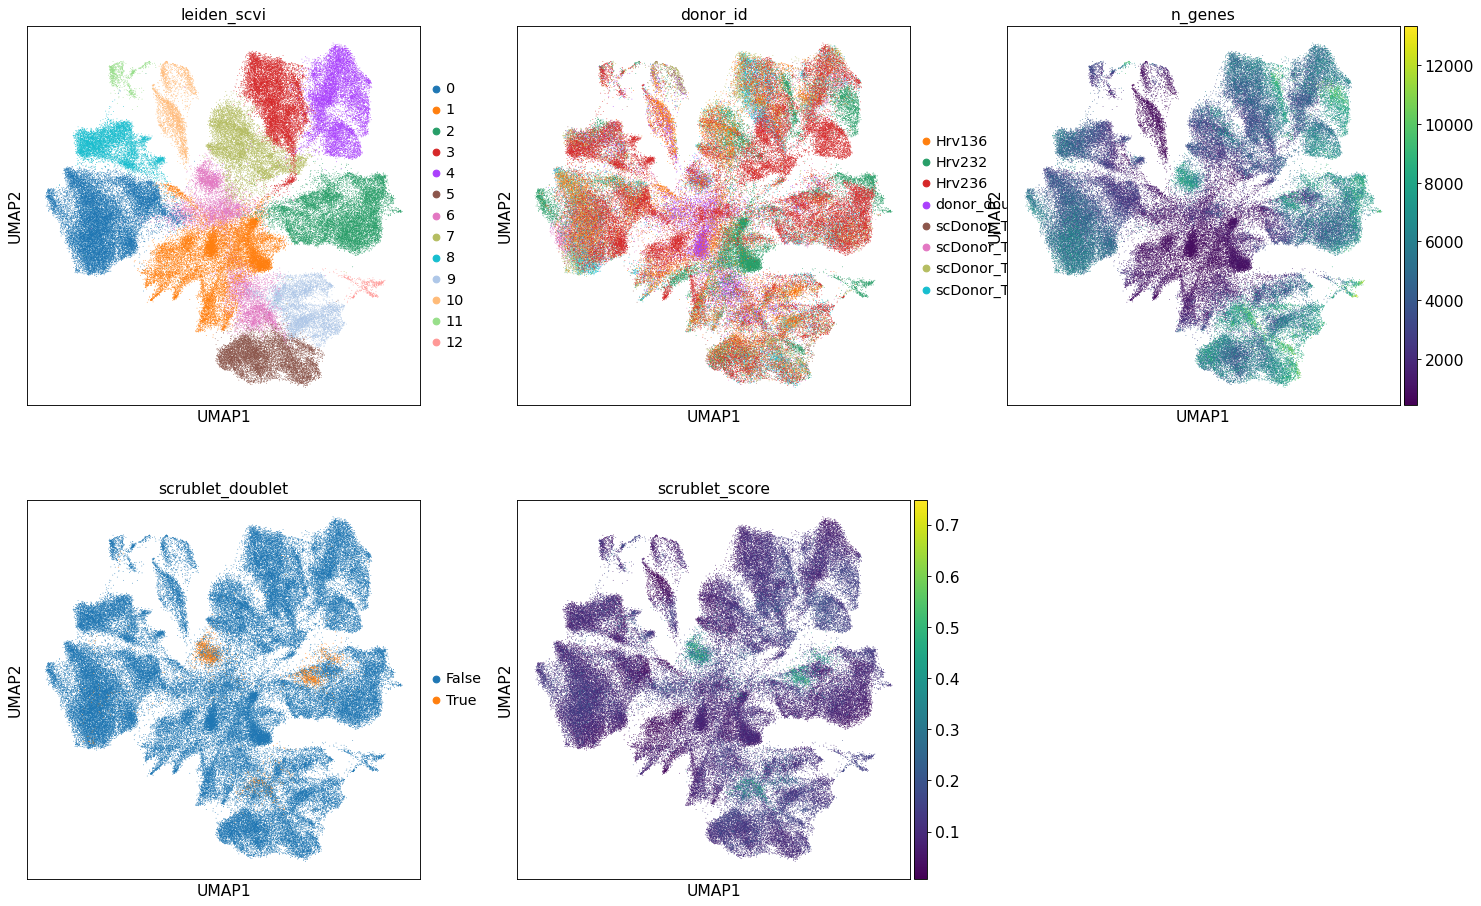

In [28]:
#trophoblats markers
sc.pl.umap(adata, color=[ 'leiden_scvi', 'donor_id','n_genes','scrublet_doublet','scrublet_score',],  ncols=3,
           size=2, save='_scVI_latent20_doubletMarkers.pdf')

In [31]:
#COpying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity
adata.obs['cell_type']= adata.obs['leiden_scvi']

In [32]:
adata.obs['cell_type']

Pla_HDBR13007976_AAACCCAAGCCTCATA     0
Pla_HDBR13007976_AAACCCAAGCTGTTAC     5
Pla_HDBR13007976_AAACCCAAGGCATCAG     0
Pla_HDBR13007976_AAACCCAAGGGAGATA    10
Pla_HDBR13007976_AAACCCACACTAAACC     5
                                     ..
Pla_HDBR13661576_TTTGTTGGTCACTGAT     6
Pla_HDBR13661576_TTTGTTGGTTTCGGCG     8
Pla_HDBR13661576_TTTGTTGTCAGCTGAT     2
Pla_HDBR13661576_TTTGTTGTCGGTTGTA     6
Pla_HDBR13661576_TTTGTTGTCTGGTTGA     0
Name: cell_type, Length: 119146, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

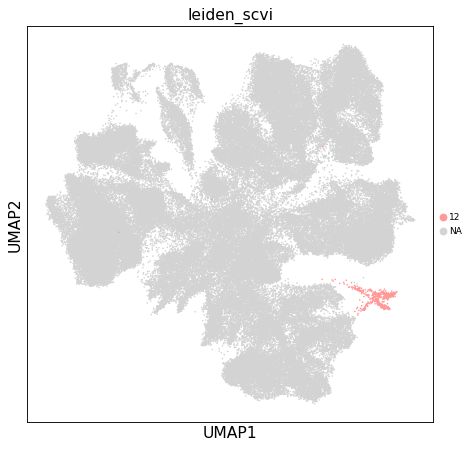

In [33]:
sc.pl.umap(adata, color=['leiden_scvi' ], legend_fontsize='xx-small', size=8, ncols=2, groups=['12'] )

In [48]:
adata.obs['cell_type'] = (adata.obs["leiden_scvi"].map(lambda x: 
                            {"0": "HBC", "1": "doublets", "2": "Endo_f", "3": "Fibroblast","4": "Fibroblast", 
                             "5": "Trophoblast", "6": "doublets", "7": "Fibroblast", "8": "PAMM1","9": "Trophoblast",
                              "10": "Erythrocytes", "11": "T cells", "12": "Epi"}
                            .get(x, x)).astype("category"))

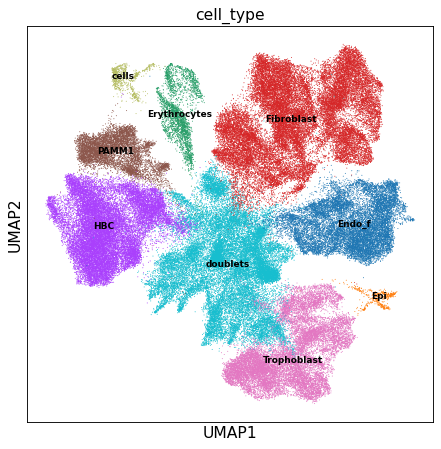

In [35]:
# use scVI imputed values for plottin
sc.pl.umap(adata, color=['cell_type'], legend_loc='on data',legend_fontsize='xx-small', size=3,
           save='_scVI_latent20_indentityDirty.pdf')


## Removal of doublet cluster, and Erythrocytes

In [49]:
adata = adata[adata.obs['cell_type'] != 'doublets']
#adata = adata[adata.obs['scrublet_doublet'] != 'True']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [50]:
adata = adata[adata.obs['cell_type'] != 'Erythrocytes']
adata = adata[adata.obs['cell_type'] != 'T cells']
adata = adata[adata.obs['cell_type'] != 'Epi']

In [51]:
#Deleting the doublets: in this case I can easily overlap the doublets identified by SoC
# and the cluster corresponding to them
#adata = adata[adata.obs['donor_id'] != 'donor_doublets']

/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_predictions' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'scrublet_doublet' as categorical


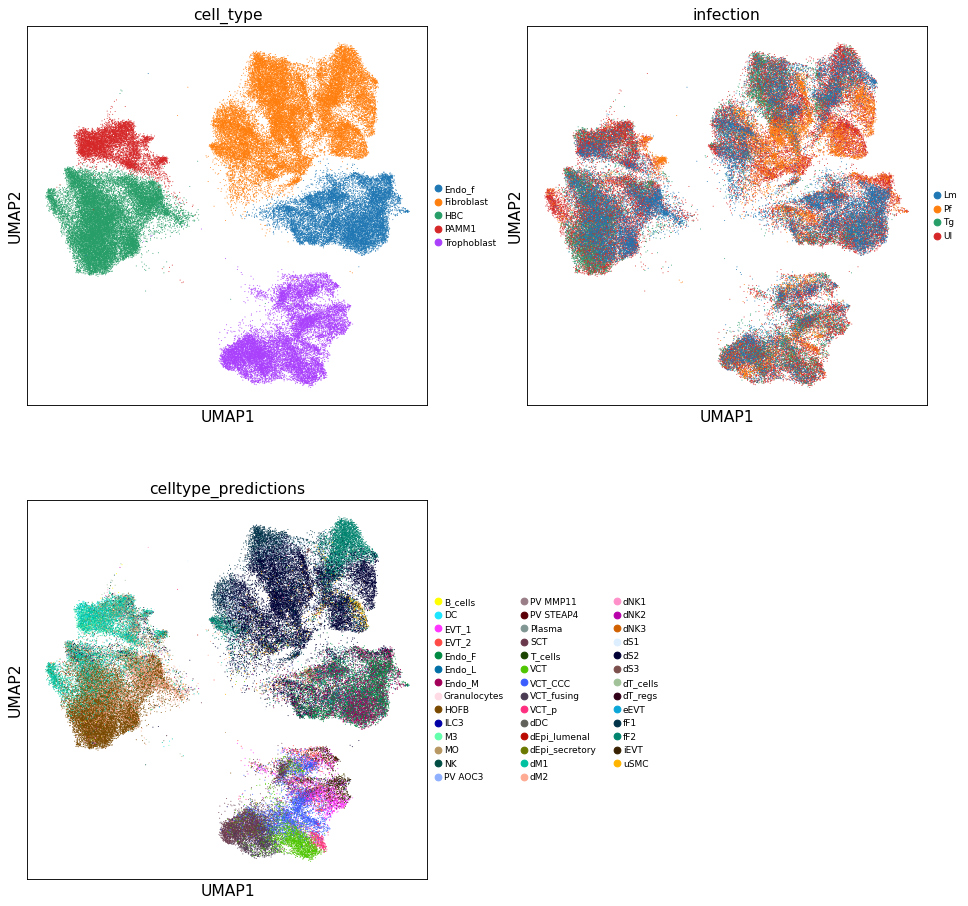

In [52]:
sc.pl.umap(adata, color=['cell_type','infection','celltype_predictions' ], legend_fontsize='xx-small', size=3, ncols=2,
           save= '_scVI_latent20_indentityNoDoublets.pdf')

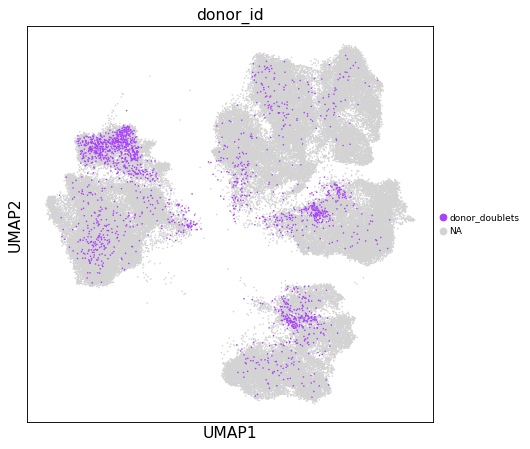

In [53]:
sc.pl.umap(adata, color=['donor_id' ], legend_fontsize='xx-small', size=8, ncols=2, groups=['donor_doublets'] )

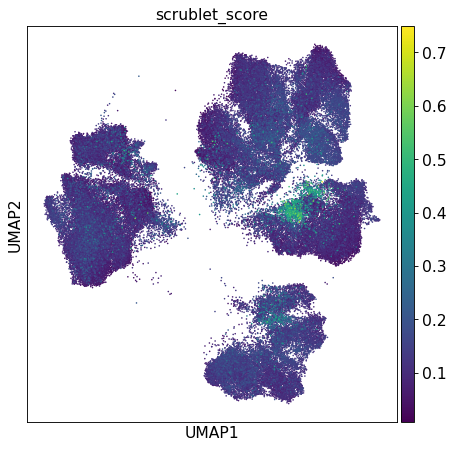

In [54]:
sc.pl.umap(adata, color=['scrublet_score' ], legend_fontsize='xx-small', size=8, ncols=2)


## Re-running Clustering after doublets were deleted

In [55]:
#LATENT 20
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_scVI_n_latent_20")
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:42)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:09)


In [56]:
#clustering. Increasing resolution to separate doublets and delete them.
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:37)


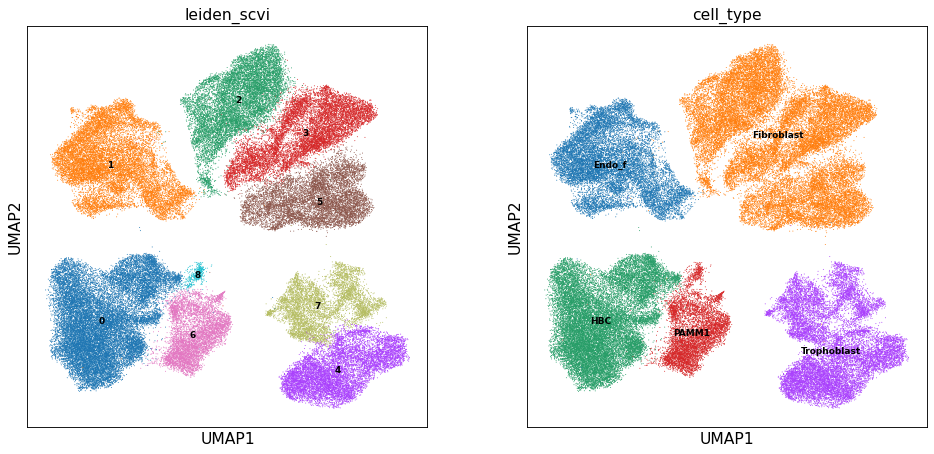

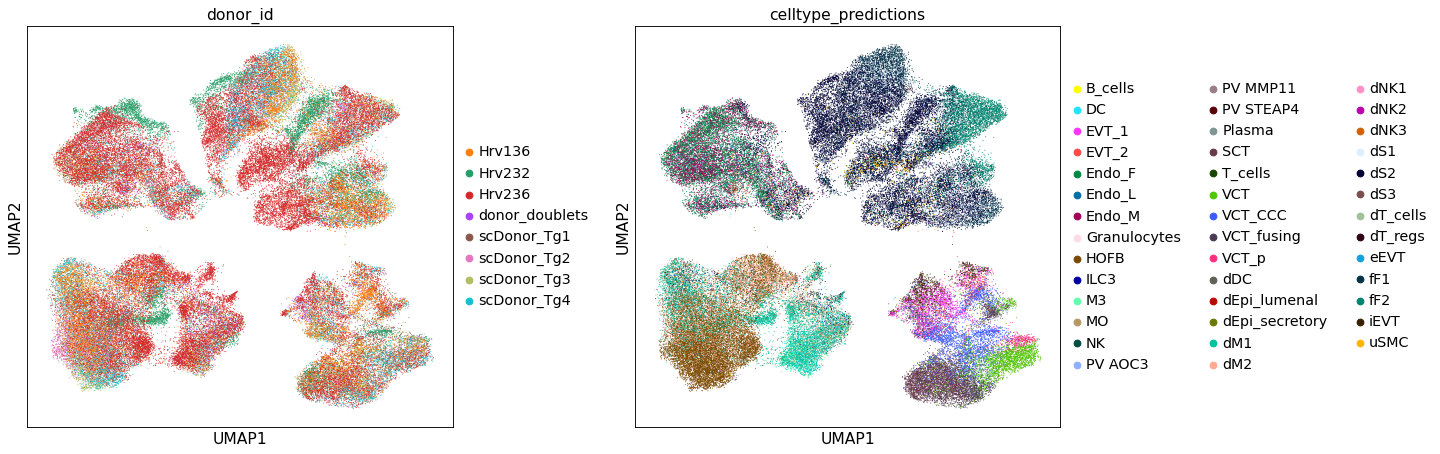

In [57]:
sc.pl.umap(adata, color=["leiden_scvi",'cell_type'], legend_loc='on data',legend_fontsize='xx-small',size=3)

sc.pl.umap(adata, color=['donor_id','celltype_predictions'], wspace=0.3, size=3)

## Saving the object semi-clean

In [58]:
adata.write('../results/scVI/rna5_scVIintegrated_latent20_noDoublets_20230707.h5ad')

In [59]:
print('Total number of cells: {:d}'.format(adata.n_obs))

Total number of cells: 88167
